### Pokemon and Stats EDA Project

source: https://www.kaggle.com/datasets/abcsds/pokemon/data

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing

In [2]:
#import csv
df = pd.read_csv("Pokemon.csv")
df.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Basic Data EDA


In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
print(df.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [6]:
duplicated = df.duplicated(keep = False)
df[duplicated]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


There are no duplicates


In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Shows that there is a total of 386 null values in 'Type 2' column. Next we shall explore "Type 2" column to see if they really are null

In [8]:
df[df["Type 2"].isnull()].head(5)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False


From my knowledge of pokemon we can determine that the null values mean that they do not have a Type 2 element. We shall replace these values with a 'Empty'

In [9]:
df['Type 2'].fillna('Empty', inplace = True)
df.head()



C:\Users\Ricky\AppData\Local\Temp\ipykernel_2980\3208040192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type 2'].fillna('Empty', inplace = True)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Empty,309,39,52,43,60,50,65,1,False


Confirm that the fillna worked

In [10]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

### Data Preprocessing

In [13]:
#new columns names
df.rename(columns = {'Type 1': 'Type_1', 'Type 2' : 'Type_2', 'Sp. Atk' : 'Sp_Atk', 'Sp. Def': 'Sp_def'}, inplace=True)
df.columns


Index(['#', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

I noticed that there was some problems with the name, specifically mega pokemon, where the name was repeated twice for example

In [14]:
mega = df['Name'].str.contains('Mega')
df[mega].head(3)

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


We can see that the name of the pokemon is repeat twice. Hence we need to clean up the name by removing the first duplication

In [15]:
#(\w+) captures the first word e.g Venusaur
#(Mega \w+) captures the 'Mega ' and pokemon name e.g Mega Venusuar
# reaplces it with Mega and first capture group (\w+)
dupes_name = df['Name'].str.replace(r'(\w+)(Mega \w+)', r'Mega \1', regex = True)
dupes_name

0                Bulbasaur
1                  Ivysaur
2                 Venusaur
3            Mega Venusaur
4               Charmander
              ...         
795                Diancie
796           Mega Diancie
797    HoopaHoopa Confined
798     HoopaHoopa Unbound
799              Volcanion
Name: Name, Length: 800, dtype: object

In [16]:
df['Name'] = dupes_name

In [17]:
mega = df['Name'].str.contains('Mega')
df[mega].head(3)

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


As we can see, we have removed the duplicated pokemon name in mega pokemon. However, I just saw that some pokemon still have their names duplicated such as hoopa. Previous code block does not work, due to regex only finding names with `Mega`

We shall see if there are anymore duplicate names

In [18]:
dupes = df[df['Name'].str.contains(r'(\b\w+)\1.')]
dupes

C:\Users\Ricky\AppData\Local\Temp\ipykernel_2980\996668843.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  dupes = df[df['Name'].str.contains(r'(\b\w+)\1.')]


,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


There is 3 observation where the name is repeated. We shall remove one of the repeated names.

In [19]:
dupes_name = df['Name'].str.replace(r'HoopaHoopa (.+)', r'Hoopa \1', regex = True)
dupes_name

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
795           Diancie
796      Mega Diancie
797    Hoopa Confined
798     Hoopa Unbound
799         Volcanion
Name: Name, Length: 800, dtype: object

In [20]:
df['Name'] = dupes_name
df[df['Name'].str.contains(r'Hoopa.+')]

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
797,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


As we can see we have fixed the hoopa name duplicated.

In [21]:
#remove the '#' column
df.drop(columns = ['#'],inplace=True)
df


,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Empty,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [22]:
#replace Bool value in legendary with binary
df['Legendary'] = df['Legendary'].astype(int)
df.head(5)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,Empty,309,39,52,43,60,50,65,1,0


### Mega variable
Here we shall create a new mega variable to denote whether the current pokemon is a mega version of itself

In [23]:
#create mega column with Bool values, if pokemon is mega version of itself
df['Mega'] = df['Name'].str.contains('Mega')
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary,Mega
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,True
4,Charmander,Fire,Empty,309,39,52,43,60,50,65,1,0,False


In [24]:
#replace Bool value in mega with binary
df['Mega'] = df['Mega'].astype(int)
df.head(5)

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,Legendary,Mega
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0,0
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0,1
4,Charmander,Fire,Empty,309,39,52,43,60,50,65,1,0,0


In [27]:
#dropping name column
df.drop('Name', axis= 1, inplace = True)

### EDA: Data Distriubtion 
Show the data distribution before categorical encoding of type1 and type2 columns. Requies categorical encoding to show correlation

In [41]:
df_copy = df.copy()

In [47]:
label_encoder = preprocessing.LabelEncoder()
df_copy['Type_1'] = label_encoder.fit_transform(df['Type_1'])
df_copy['Type_2'] = label_encoder.fit_transform(df['Type_2'])


<function matplotlib.pyplot.show(close=None, block=None)>

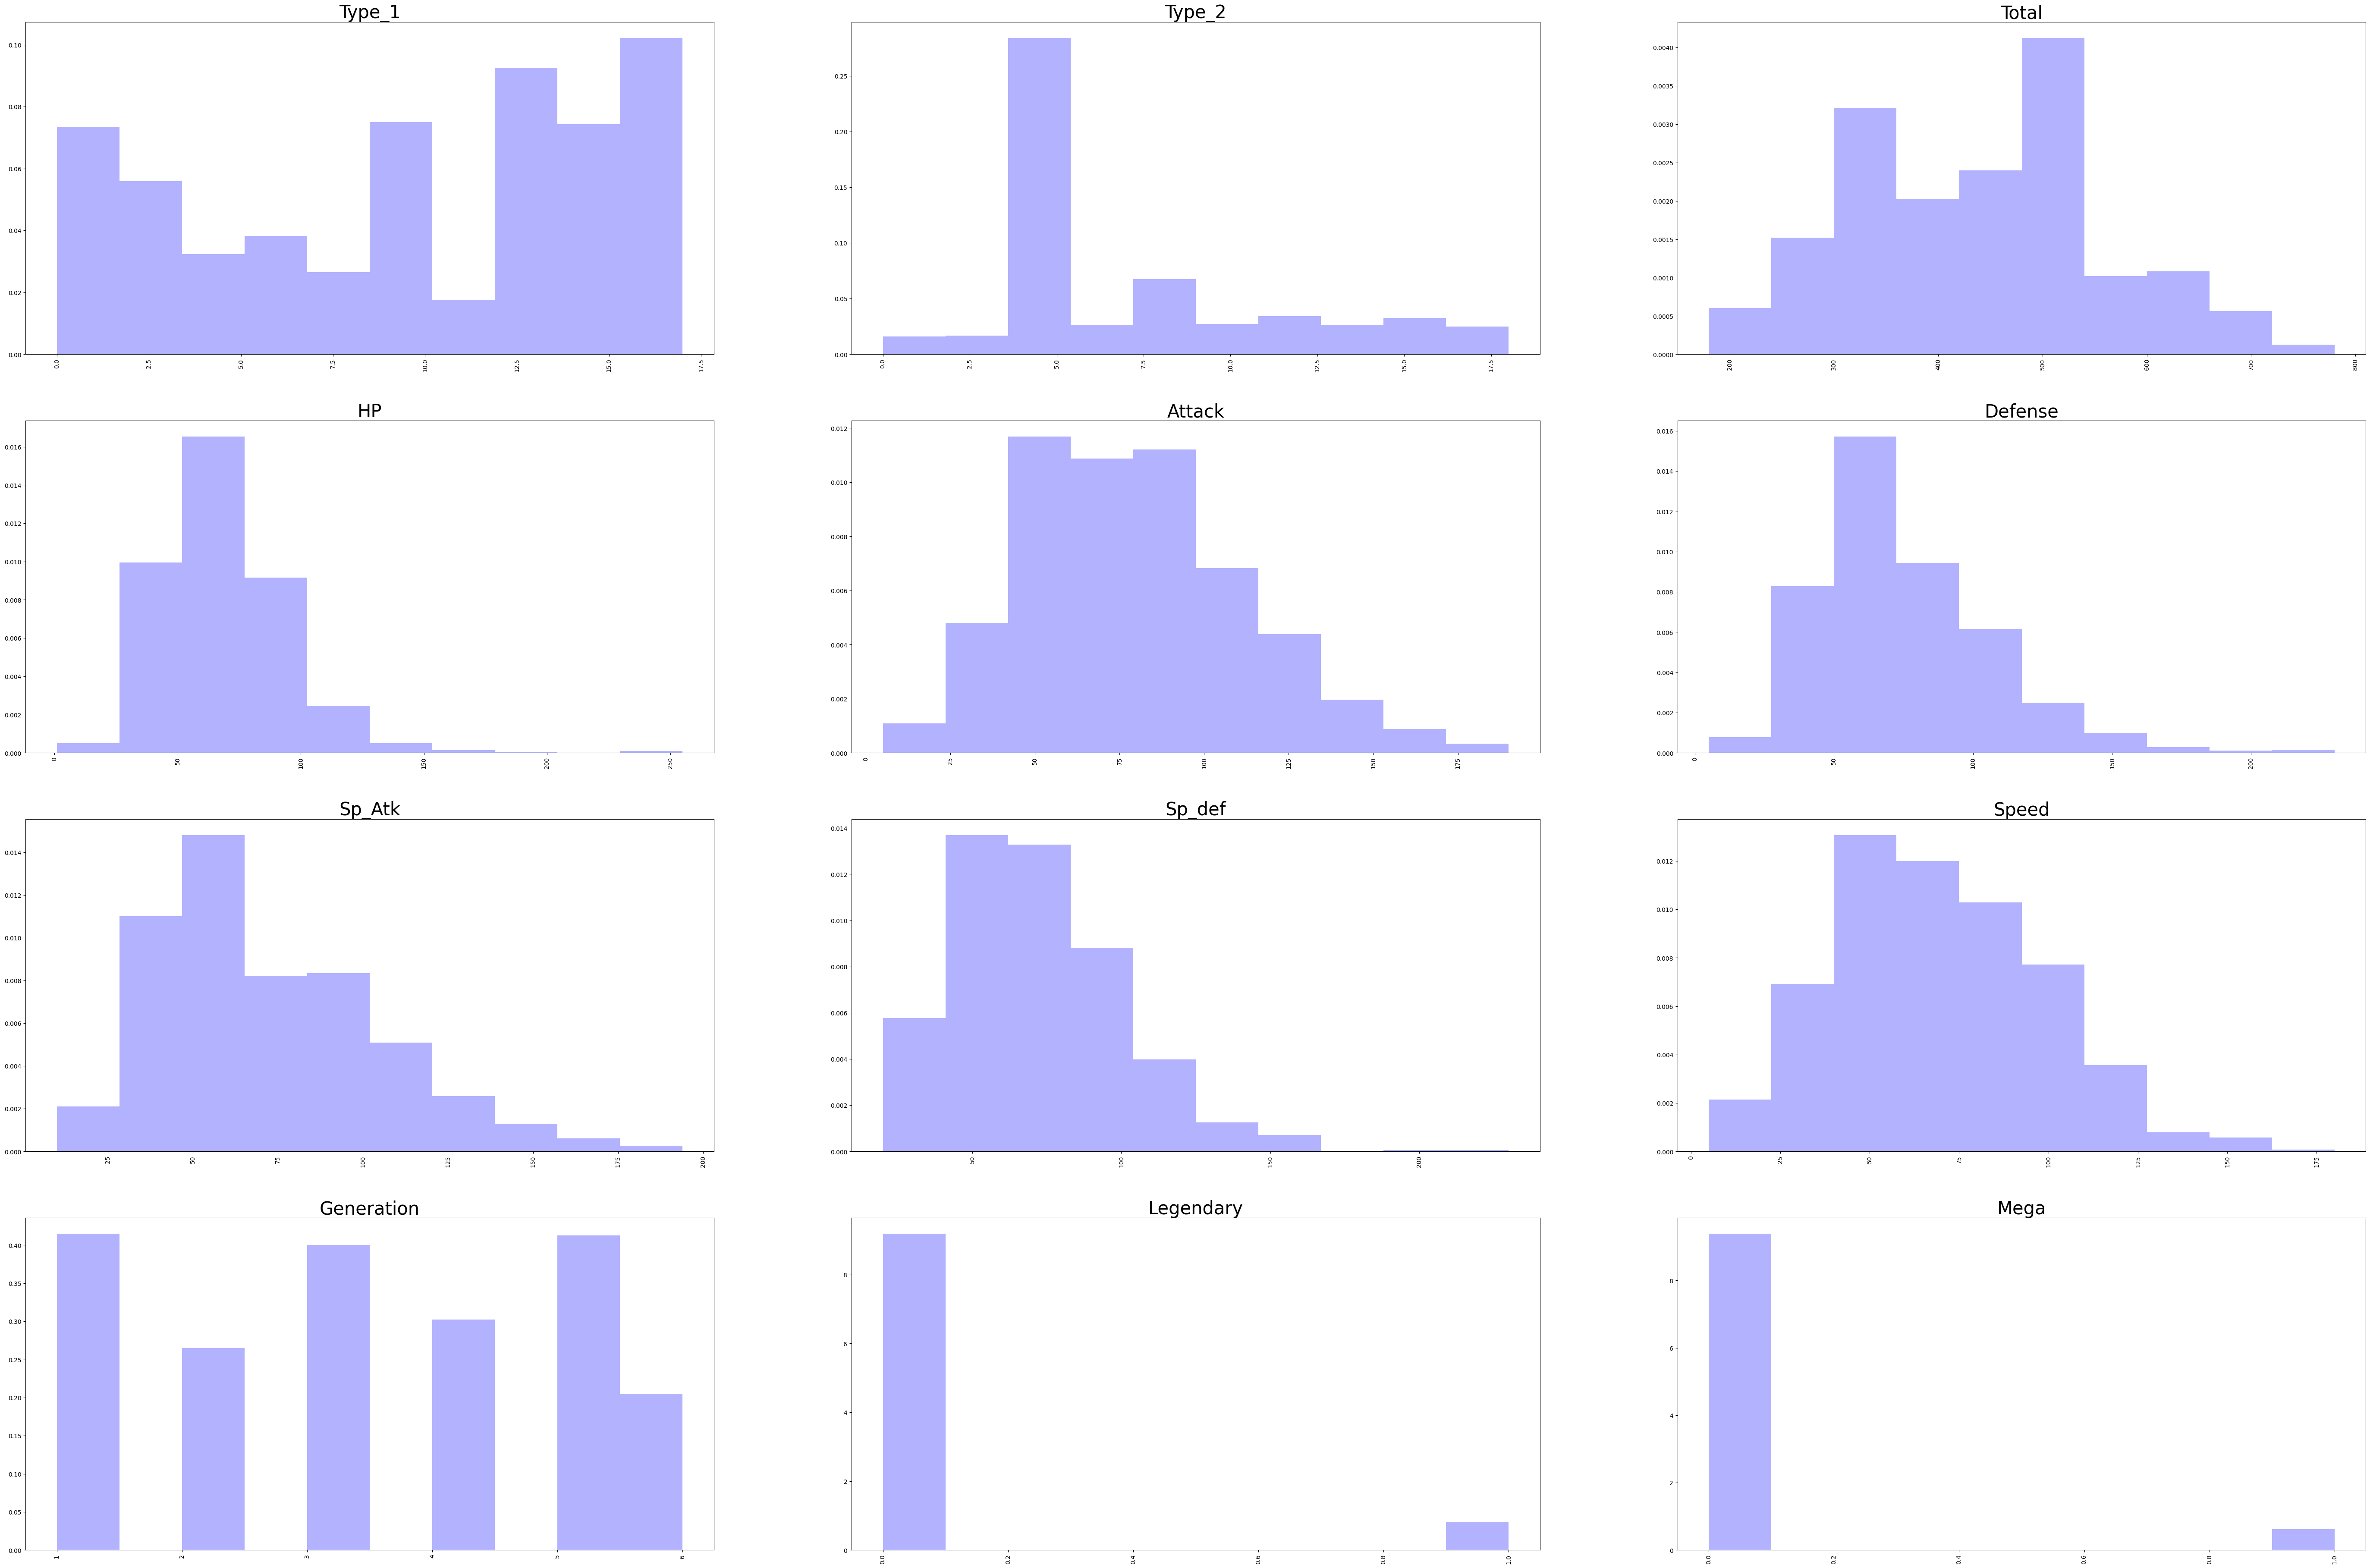

In [48]:
plt.figure(figsize=(70,70))
for i, col in enumerate(df_copy):
    plt.subplot(6,3,i+1)
    plt.hist(df_copy[col], alpha=0.3, color='b', density=True)
    plt.title(col, fontsize=30)
    plt.xticks(rotation='vertical')
plt.show

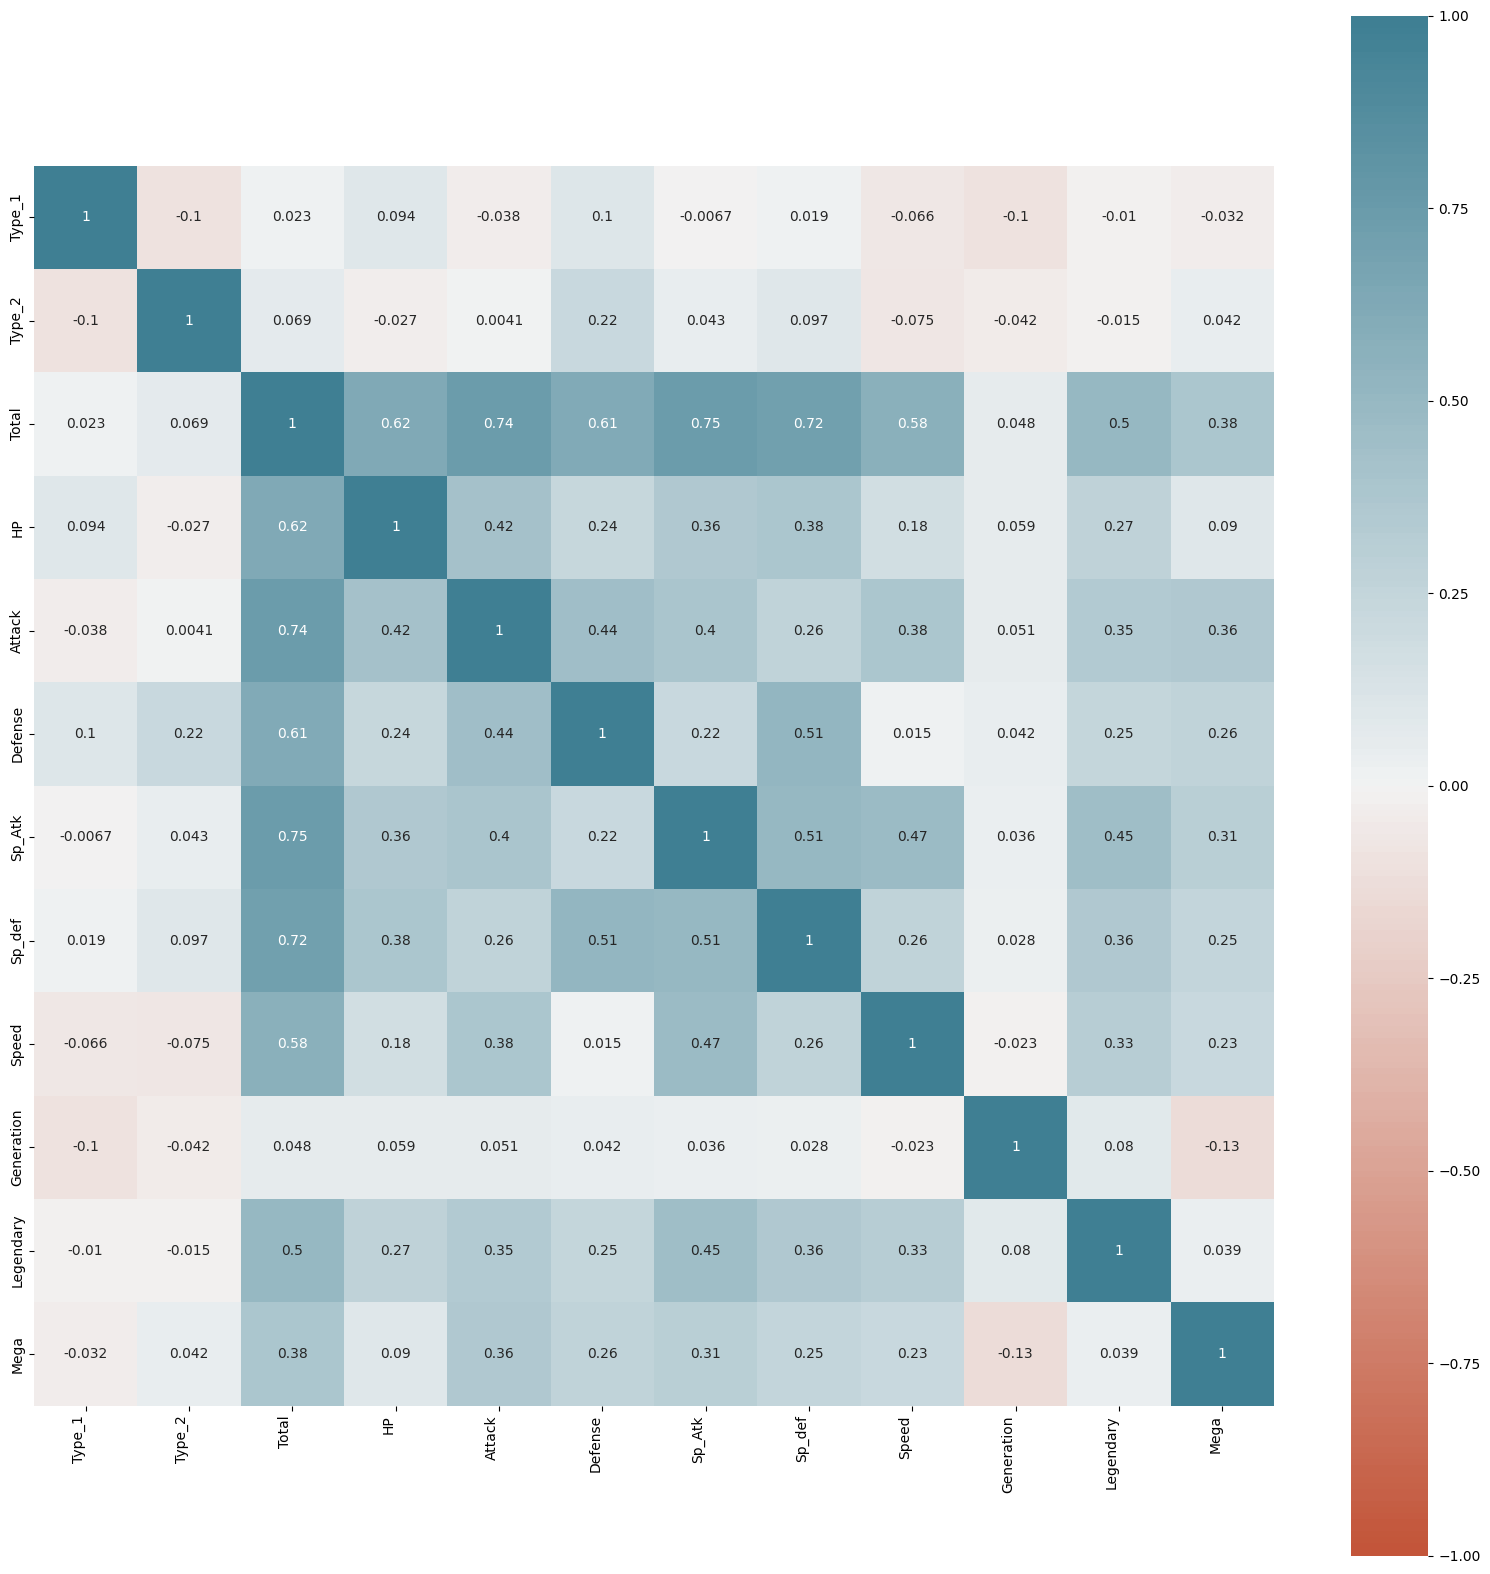

In [49]:
#correlation
f, ax = plt.subplots(figsize=(20, 20))
corr = df_copy.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

Observations:
- Sp_Atk, Sp_def, Defense shows some skewedness, might require transformation.

### Type_1 and Type_2 data encoding

In [34]:
dummies_type1 =pd.get_dummies(df['Type_1'], prefix  = 'Type_1')
dummies_type1 = dummies_type1.astype(int)
df1 = pd.concat([df, dummies_type1], axis = 1)
df1.head()

,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_def,Speed,Generation,...,Type_1_Ghost,Type_1_Grass,Type_1_Ground,Type_1_Ice,Type_1_Normal,Type_1_Poison,Type_1_Psychic,Type_1_Rock,Type_1_Steel,Type_1_Water
0,Grass,Poison,318,45,49,49,65,65,45,1,...,0,1,0,0,0,0,0,0,0,0
1,Grass,Poison,405,60,62,63,80,80,60,1,...,0,1,0,0,0,0,0,0,0,0
2,Grass,Poison,525,80,82,83,100,100,80,1,...,0,1,0,0,0,0,0,0,0,0
3,Grass,Poison,625,80,100,123,122,120,80,1,...,0,1,0,0,0,0,0,0,0,0
4,Fire,Empty,309,39,52,43,60,50,65,1,...,0,0,0,0,0,0,0,0,0,0


In [35]:
dummies_type2 =pd.get_dummies(df['Type_2'], prefix  = 'Type_2')
dummies_type2 = dummies_type2.astype(int)
df2 = pd.concat([df1, dummies_type2], axis = 1)


In [36]:
df2.drop(['Type_2', 'Type_1'], inplace=True, axis = 1)

In [37]:
df2.columns

Index(['Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_def', 'Speed',
       'Generation', 'Legendary', 'Mega', 'Type_1_Bug', 'Type_1_Dark',
       'Type_1_Dragon', 'Type_1_Electric', 'Type_1_Fairy', 'Type_1_Fighting',
       'Type_1_Fire', 'Type_1_Flying', 'Type_1_Ghost', 'Type_1_Grass',
       'Type_1_Ground', 'Type_1_Ice', 'Type_1_Normal', 'Type_1_Poison',
       'Type_1_Psychic', 'Type_1_Rock', 'Type_1_Steel', 'Type_1_Water',
       'Type_2_Bug', 'Type_2_Dark', 'Type_2_Dragon', 'Type_2_Electric',
       'Type_2_Empty', 'Type_2_Fairy', 'Type_2_Fighting', 'Type_2_Fire',
       'Type_2_Flying', 'Type_2_Ghost', 'Type_2_Grass', 'Type_2_Ground',
       'Type_2_Ice', 'Type_2_Normal', 'Type_2_Poison', 'Type_2_Psychic',
       'Type_2_Rock', 'Type_2_Steel', 'Type_2_Water'],
      dtype='object')

In [38]:
df2.to_csv('clean_pokemon')

### Splitting the data

In [50]:
train_data, test_data = train_test_split(df2, test_size = 0.2, shuffle = True, random_state = 42)